#### 1. Import the necessary libraries if you are starting a new notebook.

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [18]:
display(customer_df.shape)

(9134, 24)

In [19]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [20]:
cols = [i.replace(" ","_") for i in customer_df.columns]
customer_df.columns = cols

cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower())

customer_df.columns = cols

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [21]:
customer_df = customer_df.rename(columns={'employmentstatus':'employment status'})

In [22]:
customer_df.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [23]:
customer_df['effective_to_date']= pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

#### 2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [24]:
numericals = customer_df.select_dtypes(np.number)
categoricals = customer_df.select_dtypes(np.object)

numericals.dtypes
numericals.nunique()

def function(x):
    if len(x.value_counts())> 1000:
        return 'continuous'
    else:
        return 'discrete'

numericals.apply(function)


customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

customer_lifetime_value          continuous
income                           continuous
monthly_premium_auto               discrete
months_since_last_claim            discrete
months_since_policy_inception      discrete
number_of_open_complaints          discrete
number_of_policies                 discrete
total_claim_amount               continuous
dtype: object

In [25]:
discrete_df = numericals.drop(['customer_lifetime_value','income','total_claim_amount'], axis=1)
discrete_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [26]:
continuous_df = numericals.loc[:,['customer_lifetime_value','income','total_claim_amount']]
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


#### 3. Plot a correlation matrix, what can you see?

<AxesSubplot:>

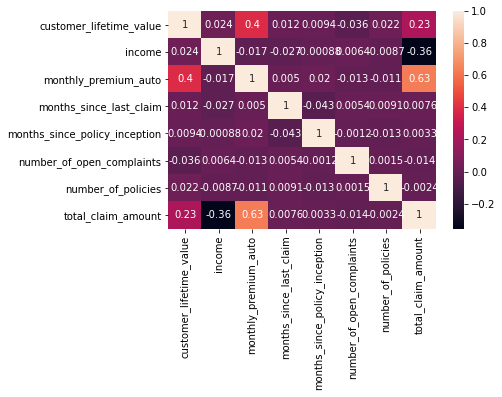

In [27]:
correlations_matrix = numericals.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [28]:
# With the correlation matrix, we can observe that both the total claim amount and the monthly premium auto are highly correlated . It is also important to point out that it exist an important correlation of these two values with the customer lifetime value.
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


#### 4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='monthly_premium_auto', ylabel='Density'>

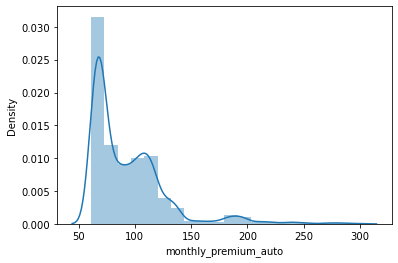

<AxesSubplot:xlabel='months_since_last_claim', ylabel='Density'>

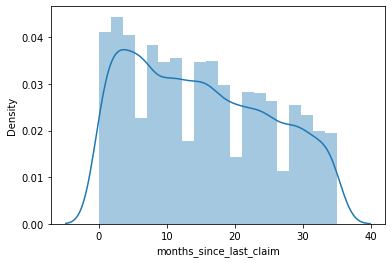

<AxesSubplot:xlabel='months_since_policy_inception', ylabel='Density'>

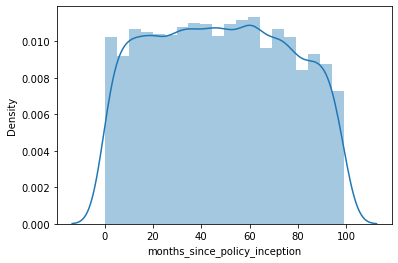

<AxesSubplot:xlabel='number_of_open_complaints', ylabel='Density'>

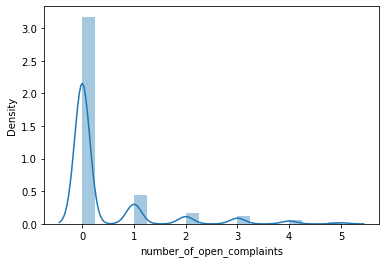

<AxesSubplot:xlabel='number_of_policies', ylabel='Density'>

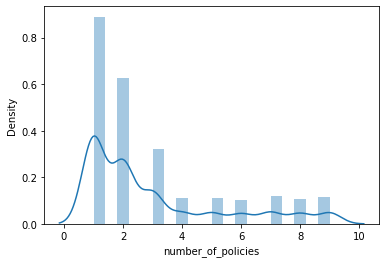

In [30]:
for i in range(len(discrete_df.columns)):
    sns.distplot(discrete_df.iloc[:,i], bins=20)
    plt.show()

#### 5. What can you see in the plots?

In [31]:
# with discrete values, it seems that the fact that they are related to strict values makes the data to more fixed.

#### 6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

<AxesSubplot:xlabel='customer_lifetime_value'>

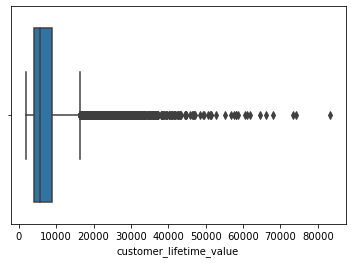

<AxesSubplot:xlabel='income'>

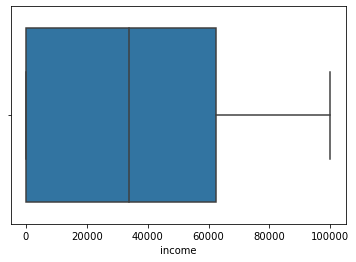

<AxesSubplot:xlabel='total_claim_amount'>

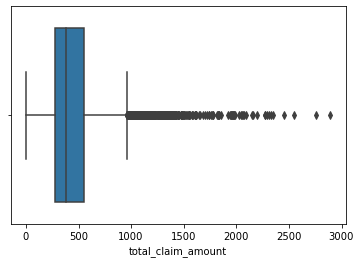

In [32]:
for i in range(len(continuous_df.columns)):
    sns.boxplot(continuous_df.iloc[:,i])
    plt.show()

#### 7. Have you found outliers? If you have, what should we do with them?

In [33]:
#after checking possible outliers, we have finally decided not to drop them.
# we are trying to reset the name of some columns using the cut function given by pandas

number_complaints= customer_df['number_of_open_complaints'].value_counts()
number_complaints

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

Not complainer         7252
Low complainer         1011
Medium complainer       374
Moderate complainer     292
High complainer         149
Super complainer         56
Name: number_of_open_complaints, dtype: int64

<AxesSubplot:>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

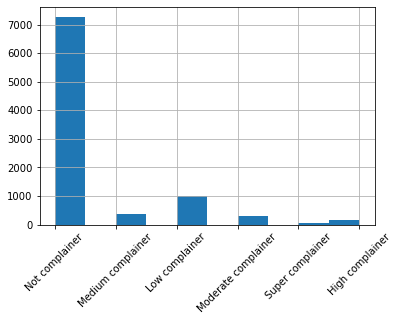

In [34]:
ic_labels = ['Not complainer', 'Low complainer','Medium complainer','Moderate complainer', 'High complainer','Super complainer']
customer_df['number_of_open_complaints'] = pd.cut(customer_df['number_of_open_complaints'],6,labels=ic_labels)
customer_df['number_of_open_complaints'].value_counts()
customer_df['number_of_open_complaints'].hist()
plt.xticks(rotation = 45)
plt.show()

#### 8. Check nan values per column.

In [35]:
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employment status                0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

#### 9. Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [36]:
#done before

#### 10. for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [37]:
categoricals.dtypes
#after checking possible incorrections in the categorical data(with value counts and unique values) we determine that there is no need to clean the categorical data

customer             object
state                object
response             object
coverage             object
education            object
employment status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

#### 11. Get categorical features.

In [38]:
categoricals.sample(5)

,customer,state,response,coverage,education,employment status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
8564,IE97795,California,No,Extended,High School or Below,Employed,M,Suburban,Married,Corporate Auto,Corporate L1,Offer3,Agent,Four-Door Car,Small
8300,XI36396,California,No,Extended,Bachelor,Retired,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Agent,Four-Door Car,Medsize
3695,TS31417,Washington,No,Basic,College,Medical Leave,M,Suburban,Married,Personal Auto,Personal L3,Offer1,Web,SUV,Medsize
258,JM62924,Washington,No,Extended,Bachelor,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer3,Branch,Four-Door Car,Medsize
2851,MP68135,Oregon,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer1,Call Center,Four-Door Car,Small


#### 12. What should we do with the customer id column?

In [39]:
categoricals1= categoricals.set_index('customer')
categoricals1.head()

,state,response,coverage,education,employment status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
